In [32]:
import matplotlib.pyplot as plt
import json

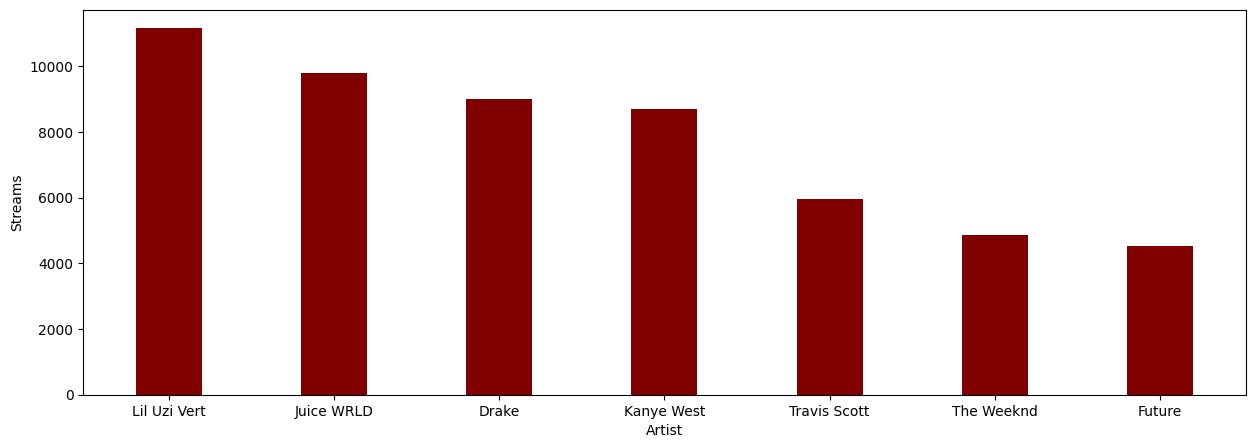

In [33]:
f = open('./2023_stats/artists.json',encoding='utf8')

topArtists = json.load(f)
noOfArtist = 7

artists = list(topArtists.keys())[:noOfArtist]
streams = list(topArtists.values())[:noOfArtist]
  
fig = plt.figure(figsize = (15, 5))

plt.bar(artists,streams,color='maroon',width=0.4)
plt.xlabel("Artist")
plt.ylabel("Streams")
plt.show()

C:\Users\Ashish\AppData\Local\Temp\ipykernel_11188\312179718.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


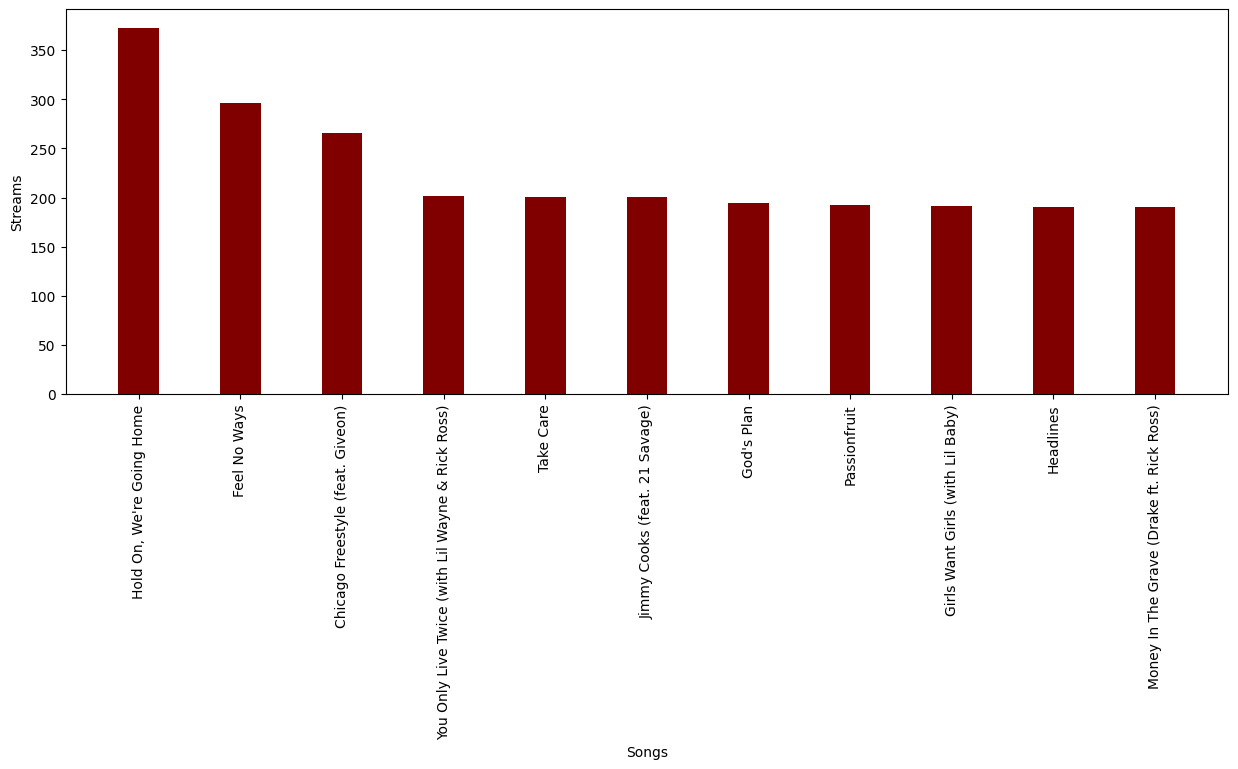

In [34]:
name = 'Drake'

f = open('./2023_stats/topTracks.json',encoding='utf8')

topSongsByArtist = json.load(f)
noOfSongs = 10

artist = topSongsByArtist[name]
songs = []
streams = []

for j,i in enumerate(artist):
    if(j>noOfSongs):
        break
    songs.append(i['title'])
    streams.append(i['streams'])
  
fig,ax = plt.subplots(figsize = (15, 5))

plt.bar(songs,streams,color='maroon',width=0.4)
plt.xlabel("Songs")
plt.ylabel("Streams")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

C:\Users\Ashish\AppData\Local\Temp\ipykernel_11188\1248138191.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


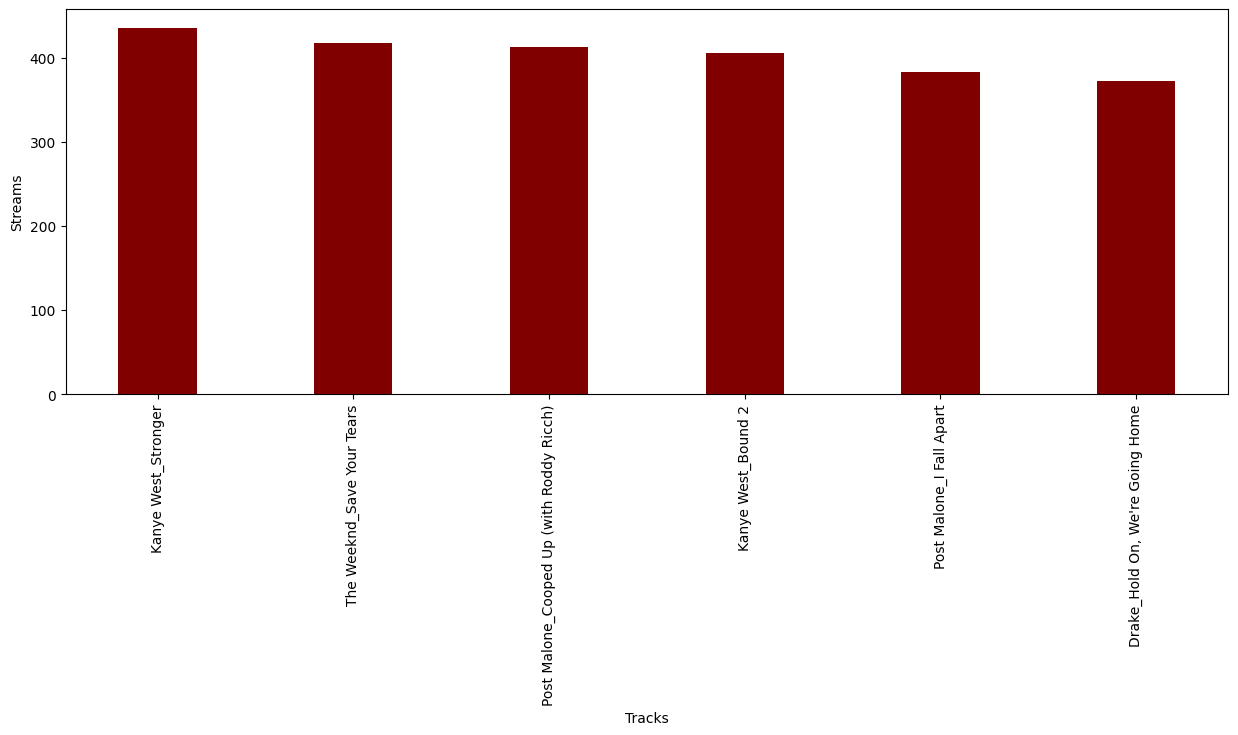

In [35]:
f = open('./2023_stats/tracks.json',encoding='utf8')

topTracks = json.load(f)
noOfTracks = 7

songs = list(topTracks.keys())[1:noOfTracks]
streams = list(topTracks.values())[1:noOfTracks]
  
fig,ax = plt.subplots(figsize = (15, 5))

plt.bar(songs,streams,color='maroon',width=0.4)
plt.xlabel("Tracks")
plt.ylabel("Streams")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()